# T3 Arbres de classificació

# Índex

1. Introducció
2. Algorisme d'aprenentatge
    * Algorisme bàsic
    * Criteri de partició
    * Impuresa d'un node
    * Maximització del decrement d'impuresa

# 1 Introducció

**Arbre de classificació:** $\;$ estructura jeràrquica per a la classificació d'objectes

**Exemple:** $\;$ arbre aprés amb el conjunt d'entrenament $\;\mathcal{D}=\{((1, 1)^t, 1), ((2, 4)^t, 2), ((5, 1)^t, 1), ((5, 4)^t, 1)\}$

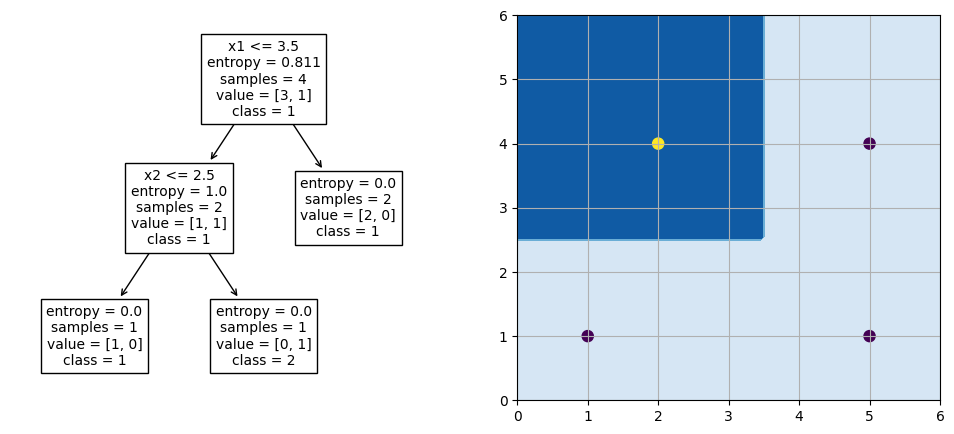

In [1]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]); y =  np.array([1, 2, 1, 1])
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_tree(dt, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 6, num=100), np.linspace(0, 6, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=64);

# 2 Algorisme d'aprenentatge

## Algorisme bàsic

> `Arbre`($\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$) <br>
>> $(\mathcal{C},L,R,\Delta \mathcal{I})=\,$`Dicotomitza`$(\mathcal{D})$ <br>
>> `si` $\;\Delta \mathcal{I}<\epsilon\quad$ `retorna` $\quad$ `Node`$($`Moda`$(\{c_n\}), -, -, -)$ <br>
>> `si no` $\qquad\quad$ `retorna` $\quad$ `Node`$(-, \mathcal{C}, $`Arbre`$(L),$`Arbre`$(R), -)$